#  Palmer Archipelago (Antractica) Penguin🐧 Data

---

## Required General Libraries📚

In [ ]:
# installing opendatasets library
!pip install opendatasets

In [144]:
# interacting with the system os
import os

# Data Wrangling
import numpy as np
import pandas as pd

# importing dataset from kaggle
import opendatasets as ods

# Data Visualization👀
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(10, 8)
plt.rcParams.update({
    'font.size': 14
})

In [128]:
# loading data from kaggle
dataset_path = 'https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data'
ods.download(dataset_path)

Skipping, found downloaded files in "./palmer-archipelago-antarctica-penguin-data" (use force=True to force download)


In [129]:
# redirecting to downloaded file
path = 'palmer-archipelago-antarctica-penguin-data/'
os.listdir(path)

['penguins_size.csv', 'penguins_lter.csv']

In [130]:
# reading csv file
data = pd.read_csv(path+'penguins_lter.csv')
data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

From the above result we idea about the null values in every columns.
- The **Comments** has only 26 rows that has data out of 344 so it will be a good option to drop it.

In [132]:
data.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [133]:
print( "rows:", data.shape[0] )
print( "columns:", data.shape[1] )


rows: 344
columns: 17


In [134]:
data['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

we have 3 type of different penguins

In [135]:
data.groupby('Species').mean()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Species,,,,,,,
Adelie Penguin (Pygoscelis adeliae),76.5,38.791391,18.346358,189.953642,3700.662252,8.859733,-25.804194
Chinstrap penguin (Pygoscelis antarctica),34.5,48.833824,18.420588,195.823529,3733.088235,9.356155,-24.546542
Gentoo penguin (Pygoscelis papua),62.5,47.504878,14.982114,217.186992,5076.016260,8.245338,-26.185298


In [136]:
data.groupby('Species').median()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Species,,,,,,,
Adelie Penguin (Pygoscelis adeliae),76.5,38.80,18.40,190.0,3700.0,8.88098,-25.976960
Chinstrap penguin (Pygoscelis antarctica),34.5,49.55,18.45,196.0,3700.0,9.37369,-24.572375
Gentoo penguin (Pygoscelis papua),62.5,47.30,15.00,216.0,5000.0,8.25117,-26.221575


In [137]:
data['Region'].value_counts()

Anvers    344
Name: Region, dtype: int64

In [138]:
data['Stage'].value_counts()

Adult, 1 Egg Stage    344
Name: Stage, dtype: int64

- In this data-set there is only one one region mentioned.
- In this data-set there is only one one stage for all penguins.
<br>
if a column has a single value repeatedly then it will not benefit our modul there for we will drop it.

In [139]:
data.drop(['Region', 'Stage', 'Comments'], axis='columns', inplace = True)

In [140]:
data.head()

,studyName,Sample Number,Species,Island,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426


---

## Missing Data

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Island               344 non-null    object 
 4   Individual ID        344 non-null    object 
 5   Clutch Completion    344 non-null    object 
 6   Date Egg             344 non-null    object 
 7   Culmen Length (mm)   342 non-null    float64
 8   Culmen Depth (mm)    342 non-null    float64
 9   Flipper Length (mm)  342 non-null    float64
 10  Body Mass (g)        342 non-null    float64
 11  Sex                  334 non-null    object 
 12  Delta 15 N (o/oo)    330 non-null    float64
 13  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 37.8+ KB


In [186]:
data['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

In [212]:
data['Sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

Originally there are 2 types of Values **Male** and **Female**.
<br>
also there are two kind of **Null values: Nan and dot(.)** .
<br> to fill these missing value we will use **simple Imputer** from **scikit learn** library. 

In [235]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

pipeline =Pipeline([
    ('impute_nan', SimpleImputer( missing_values=np.nan, strategy='most_frequent' ) ),
    ('impute_dot', SimpleImputer( missing_values='.', strategy='most_frequent' ))
])
    

sex_feature = pipeline.fit_transform( data.Sex.to_numpy().reshape(-1, 1) )

# now replacing the complete array with the sex column that has missing values
data['Sex']=sex_feature.flatten()

<AxesSubplot:>

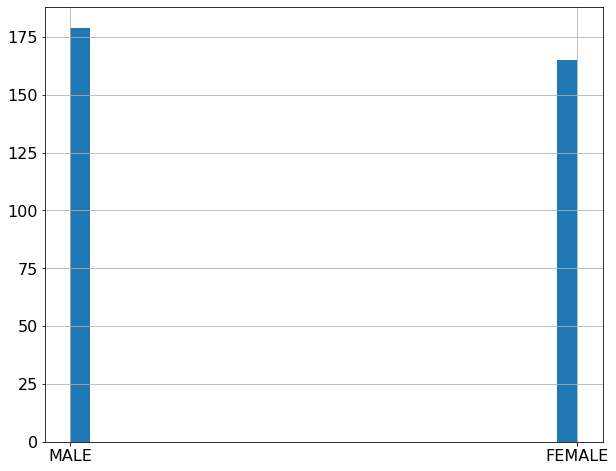

In [237]:
data.Sex.hist(bins=25)

In [246]:
data['Delta 15 N (o/oo)'] = data['Delta 15 N (o/oo)'].fillna(data['Delta 15 N (o/oo)'].median())
data['Delta 13 C (o/oo)'] = data['Delta 13 C (o/oo)'].fillna(data['Delta 13 C (o/oo)'].median())

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Island               344 non-null    object 
 4   Individual ID        344 non-null    object 
 5   Clutch Completion    344 non-null    object 
 6   Date Egg             344 non-null    object 
 7   Culmen Length (mm)   342 non-null    float64
 8   Culmen Depth (mm)    342 non-null    float64
 9   Flipper Length (mm)  342 non-null    float64
 10  Body Mass (g)        342 non-null    float64
 11  Sex                  344 non-null    object 
 12  Delta 15 N (o/oo)    344 non-null    float64
 13  Delta 13 C (o/oo)    344 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 37.8+ KB


### Missing Data of Following Columns
- Culmen Length (mm)
- Culmen Depth (mm)
- Flipper Length (mm)
- Body Mass (g)

In [171]:
columns = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
data[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Culmen Length (mm)   342 non-null    float64
 1   Culmen Depth (mm)    342 non-null    float64
 2   Flipper Length (mm)  342 non-null    float64
 3   Body Mass (g)        342 non-null    float64
dtypes: float64(4)
memory usage: 10.9 KB


in above columns we have only 2 missing columns so it is good option to drop them.

In [249]:
data.dropna(how = 'any', axis = 'rows', inplace = True)

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            342 non-null    object 
 1   Sample Number        342 non-null    int64  
 2   Species              342 non-null    object 
 3   Island               342 non-null    object 
 4   Individual ID        342 non-null    object 
 5   Clutch Completion    342 non-null    object 
 6   Date Egg             342 non-null    object 
 7   Culmen Length (mm)   342 non-null    float64
 8   Culmen Depth (mm)    342 non-null    float64
 9   Flipper Length (mm)  342 non-null    float64
 10  Body Mass (g)        342 non-null    float64
 11  Sex                  342 non-null    object 
 12  Delta 15 N (o/oo)    342 non-null    float64
 13  Delta 13 C (o/oo)    342 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 40.1+ KB


---

![penguin culmen](https://pbs.twimg.com/media/EaAXQn8U4AAoKUj?format=jpg&name=4096x4096)

[Text(0.5, 0, 'Culmen Length'),
 Text(0, 0.5, 'Culmen Depth'),
 Text(0.5, 1.0, 'Culmen Length vs Culmen Depth')]

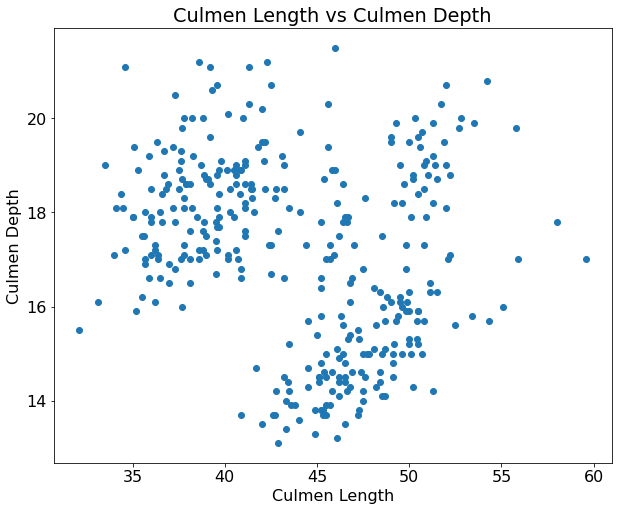

In [145]:
# ploting Culmen Length aginst Culmen Depth using scatter plot
ax = plt.axes()

ax.scatter(data['Culmen Length (mm)'],
           data['Culmen Depth (mm)']
    )

# labaling plot
ax.set(
    xlabel='Culmen Length',
    ylabel = 'Culmen Depth',
    title = 'Culmen Length vs Culmen Depth'
    )

[Text(0.5, 1.0, 'Flipper Length distribution'),
 Text(0.5, 0, 'Flipper Length (mm)'),
 Text(0, 0.5, 'Range')]

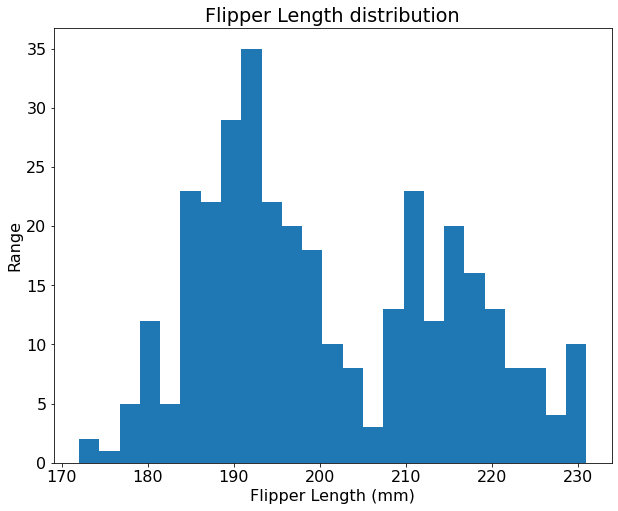

In [251]:
ax = plt.axes()
ax.hist(data['Flipper Length (mm)'], bins=25)

ax.set(
    title = 'Flipper Length distribution',
    xlabel = 'Flipper Length (mm)',
    ylabel = 'Range'
)

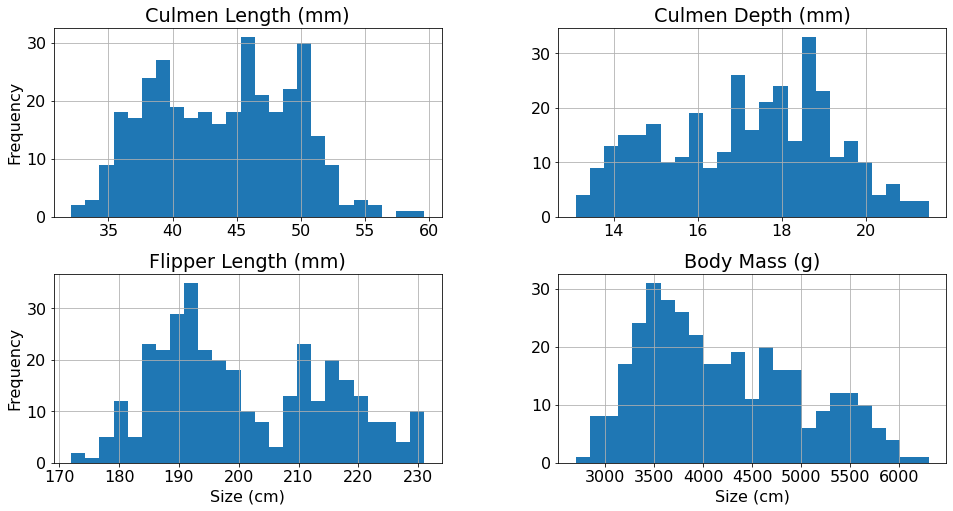

In [252]:
columns = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']

axList = data[columns].hist( bins = 25, figsize=(16,8) )

for ax in (axList[1][1], axList[1][0]):
    ax.set_xlabel('Size (cm)')
    
for ax in (axList[0][0], axList[1][0]):
    ax.set_ylabel('Frequency')

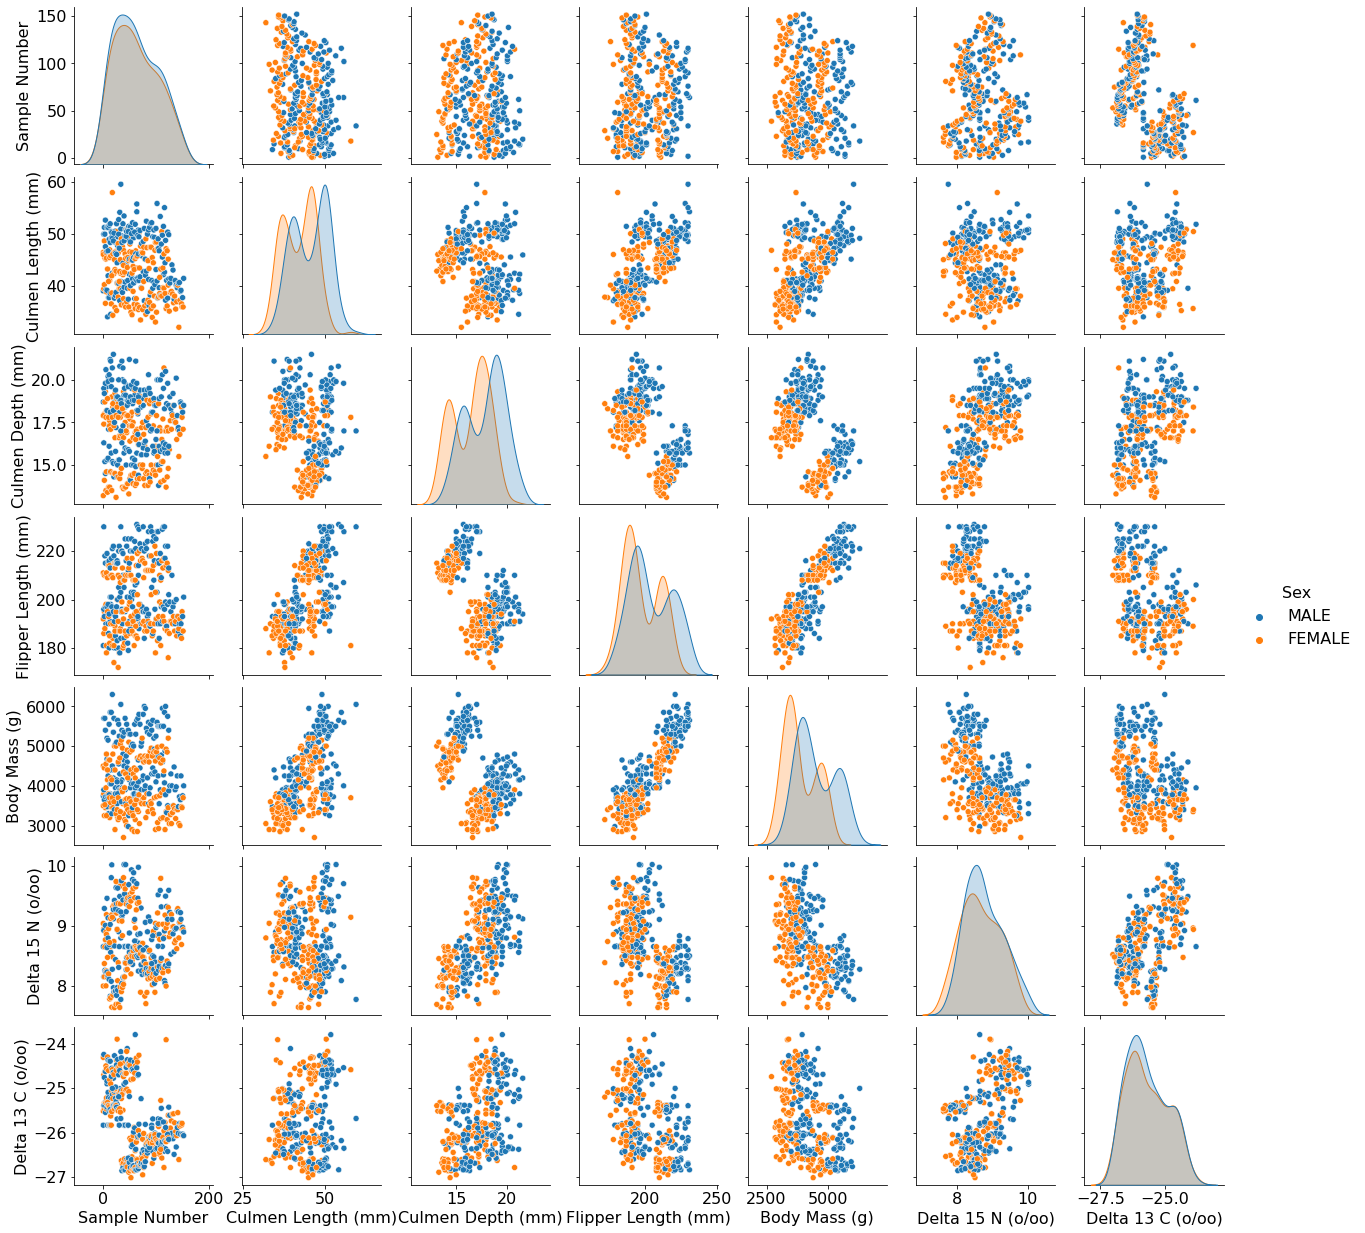

In [253]:
sns.pairplot(data, hue= 'Sex')

## Converting Categrocial Data

In [255]:
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 KB 439.4 kB/s eta 0:00:00a 0:00:01


In [257]:
data.studyName.value_counts()

PAL0910    119
PAL0809    114
PAL0708    109
Name: studyName, dtype: int64

In [258]:
data.Species.value_counts()

Adelie Penguin (Pygoscelis adeliae)          151
Gentoo penguin (Pygoscelis papua)            123
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

In [260]:
data.Island.value_counts()

Biscoe       167
Dream        124
Torgersen     51
Name: Island, dtype: int64

In [263]:
len(data['Individual ID'].unique())

190

In [265]:
data['Clutch Completion'].value_counts()

Yes    307
No      35
Name: Clutch Completion, dtype: int64

In [271]:
data.Sex.value_counts()

MALE      177
FEMALE    165
Name: Sex, dtype: int64

- for **Species, Island, Sex, Clutch Completion and  studyName** column we will use **get dummies** for **pandas**.

In [279]:
columns = ['Species', 'Island', 'Sex', 'Clutch Completion', 'studyName']
numric_of_category = pd.get_dummies(data[columns], drop_first=True)

In [284]:
data.drop(columns, axis='columns', inplace = True)

In [294]:
data = data.join(numric_of_category)

we will convert **Date Egg** column to date time

In [295]:
data['Date Egg'] = pd.to_datetime(data['Date Egg'])

For **Indvidual ID** we will use **Ordinal Encoder** using **scikit learn*

In [296]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

date_encoder = encoder.fit_transform(data['Date Egg'].to_numpy().reshape(-1, 1))

data['Date Egg']= date_encoder.flatten()

In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Sample Number                                      342 non-null    int64  
 1   Individual ID                                      342 non-null    object 
 2   Date Egg                                           342 non-null    float64
 3   Culmen Length (mm)                                 342 non-null    float64
 4   Culmen Depth (mm)                                  342 non-null    float64
 5   Flipper Length (mm)                                342 non-null    float64
 6   Body Mass (g)                                      342 non-null    float64
 7   Delta 15 N (o/oo)                                  342 non-null    float64
 8   Delta 13 C (o/oo)                                  342 non-null    float64
 9   Species_Ch

---

<AxesSubplot:>

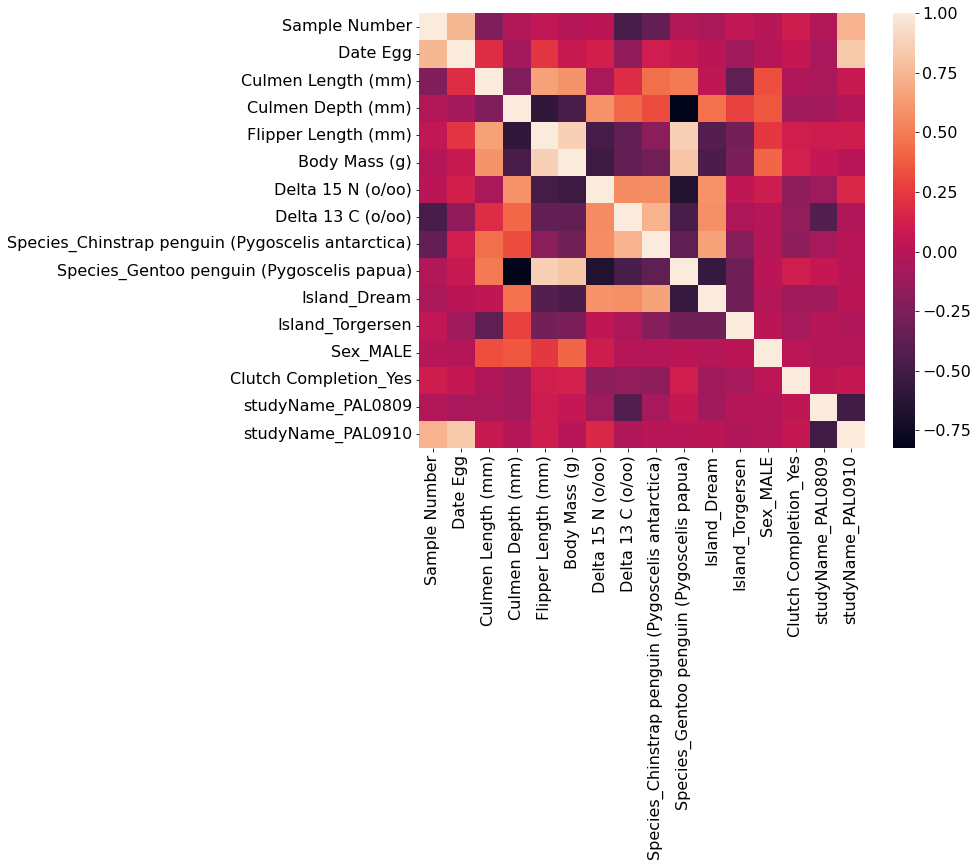

In [298]:
sns.heatmap(data.corr())

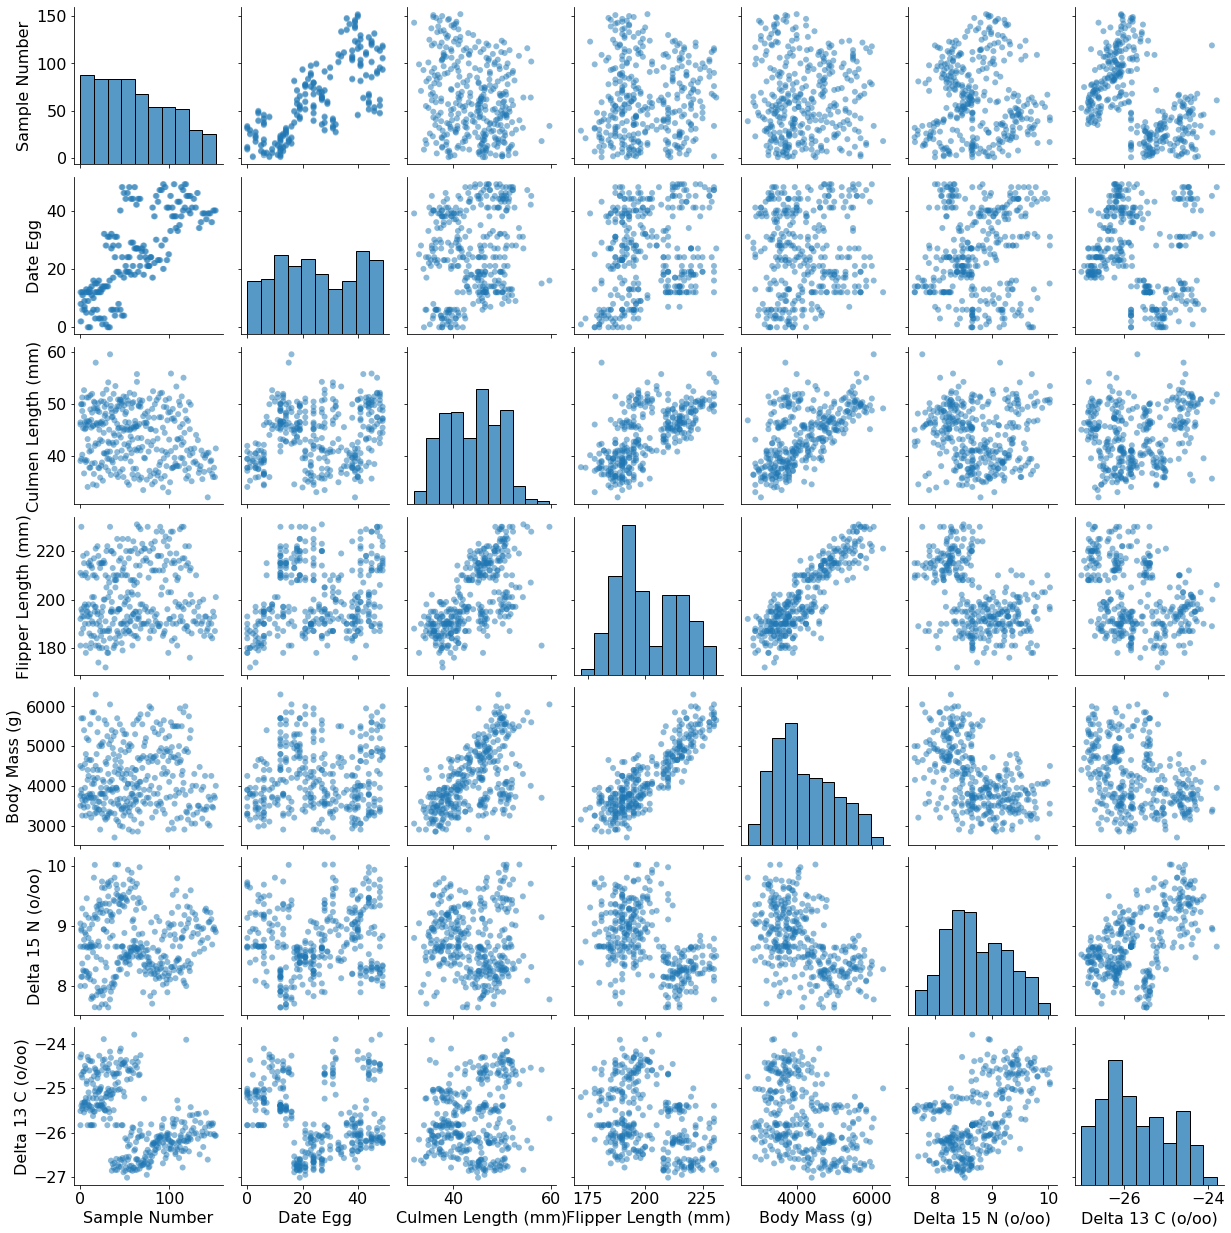

In [311]:
columns = ['Sample Number', 'Individual ID', 'Date Egg', 'Culmen Length (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
sns.pairplot(data[columns], plot_kws=dict(alpha = 0.5, edgecolor = 'none'))

In [ ]:
!sudo apt-get install pandoc

Password: